<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [1]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2022-10-05 19:21:06--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28,77M   225KB/s    in 82s     

2022-10-05 19:22:29 (361 KB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [2]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2022-10-05 19:22:49--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

pth                  19%[==>                 ]  40,80M   172KB/s    eta 5m 5s  

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [2]:
!python train.py --dataroot /n/pfister_lab2/Lab/scajas/DATASETS/DATASET_pix2pix/train/ --name vcg --dataset_mode vcg --model pix2pix --direction BtoA --use_wandb

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /home/sebasmos/Desktop/DATASETS/pix2pix/train/	[default: None]
             dataset_mode: vcg                           	[default: aligned]
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    e

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

In [ ]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb

In [6]:
!pwd

/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix


# Visualize

In [73]:
path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/wandb/small_artifacts_06_10_22/files/media/images"

In [74]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skimage import io

import os.path

%matplotlib inline


def plot_imgs(imgs, titles):
    """
    Generate visualization of list of arrays
    :param imgs: list of arrays, each numpy array is an image of size (width, height)
    :param titles: list of titles [string]
    """
    # create figure
    fig = plt.figure(figsize=(70, 70))
    # loop over images
    for i in range(len(imgs)):
        fig.add_subplot(4, 4, i + 1)
        plt.imshow(imgs[i])
        plt.title(str(titles[i]))
        plt.axis("off")

print("total # elements: ", len(os.listdir(path)))
def find_max(path):
    acum = 0
    for idx, element in enumerate(os.listdir(path)):
        e = int(element.split("_")[2])
        if e>=acum:
            acum = e
    return acum
max_num = find_max(path)
print("take max file: ", max_num)

imgs = []
img_paths = []
for idx, element in enumerate(os.listdir(path)):
        if str(max_num) in element.split("_")[2]:
            print("Image: ", element)
            image_path =os.path.join(path, element)
            if os.path.exists(image_path):
                img = io.imread(image_path)
                img_paths.append(element[:6])
                #print(img.shape)
                imgs.append(img[:,:,0])

total # elements:  3579
take max file:  6163
Image:  real_A_6163_8ee49f9c1a776fca5bcf.png
Image:  fake_B_6163_12b05cf8d3431dea42ce.png
Image:  real_B_6163_82be3e51b5f10b7def4c.png


In [71]:
img_paths

['real_A', 'fake_B', 'real_B']

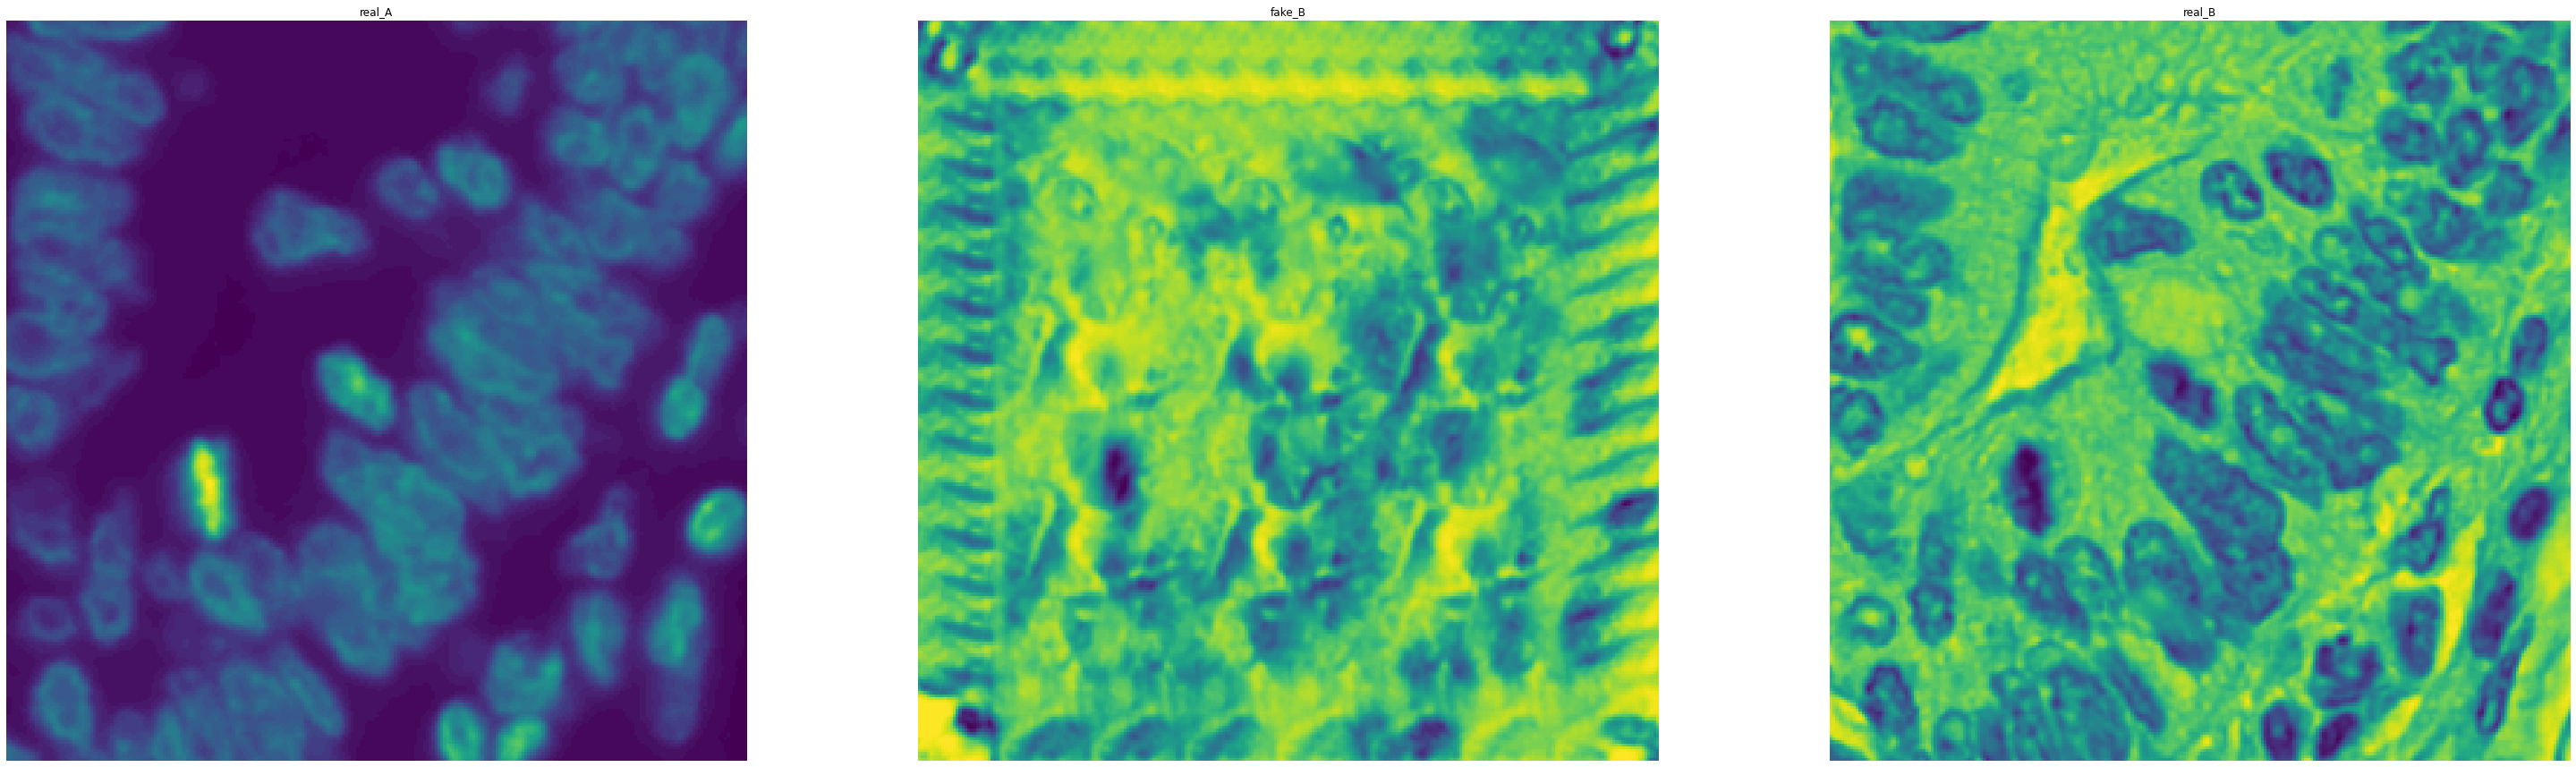

In [72]:
plot_imgs(imgs, img_paths)
plt.show()

In [75]:
channels = [0,3,17] # visual markers
label = io.imread(label).squeeze()
label = [label[ch,:,:] for ch in channels]
label = np.array(label)
vector = [label[0,:,:], label[1,:,:], label[2,:,:]]
titles = ["[CH 0] LABEL "+str(idx), "[CH 3] LABEL"+str(idx), "[CH 17] LABEL"+str(idx)]
fig = plt.figure('fig_size', (10, 10))
plot_imgs(vector, titles)